In [6]:
# Importing libraries and packages:

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.cross_validation import cross_val_score
from sklearn import metrics
from sklearn import preprocessing
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import warnings
with warnings.catch_warnings():
    warnings.filterwarnings("ignore",category=DeprecationWarning)

In [2]:
#reading the csv into a pandas data frame
movies_df = pd.read_csv('movie_metadata2_usa.csv')
#movies_df = pd.get_dummies(movies_df)

FileNotFoundError: File b'movie_metadata2_usa.csv' does not exist

In [ ]:
movies_df.head()

In [ ]:
#scaling all the features to plot them and see if we can find any good looking features to start with
X_scaled = movies_df[[ 'num_user_for_reviews','cast_total_facebook_likes','director_facebook_likes','num_critic_for_reviews', 'budget', 'imdb_score', 'title_year', 'num_voted_users','duration', 'facenumber_in_poster']]
#X_scaled.columns = ['budget', 'duration', 'imdb_score', 'title_year', 'num_voted_users', 'facenumber_in_poster']
X_scaled = X_scaled.apply(lambda x: ((x - x.min()) / (x.max() - x.min())))
X_scaled.head()

In [ ]:
y = movies_df[['gross']]
%matplotlib inline
x = X_scaled['imdb_score']
plt.xlim([0, 1])
plt.ylim([0, 760000000])
plt.scatter(x, y, alpha=0.9)
plt.show()

In [ ]:
%matplotlib inline
x = X_scaled['duration']
plt.xlim([0, 0.5])
plt.ylim([0, 760000000])
plt.scatter(x, y, alpha=0.9)
plt.show()

In [ ]:
%matplotlib inline
x = X_scaled['budget']
plt.xlim([0, 1])
plt.ylim([0, 760000000])
plt.scatter(x, y, alpha=0.9)
plt.show()

In [ ]:
%matplotlib inline
x = X_scaled[['num_voted_users']]
plt.xlim([0, 1])
plt.ylim([0, 760000000])
plt.scatter(x, y, alpha=0.9)
plt.show()

In [ ]:
%matplotlib inline
x = X_scaled['num_user_for_reviews']
plt.xlim([0, 1])
plt.ylim([0, 760000000])
plt.scatter(x, y, alpha=0.9)
plt.show()

In [3]:
%matplotlib inline
x = X_scaled['cast_total_facebook_likes']
plt.xlim([0, 0.4])
plt.ylim([0, 760000000])
plt.scatter(x, y, alpha=0.9)
plt.show()

NameError: name 'X_scaled' is not defined

In [4]:
%matplotlib inline
x = X_scaled['director_facebook_likes']
plt.xlim([0, 0.4])
plt.ylim([0, 760000000])
plt.scatter(x, y, alpha=0.9)
plt.show()

NameError: name 'X_scaled' is not defined

In [5]:
%matplotlib inline
x = X_scaled['num_critic_for_reviews']
plt.xlim([0, 1])
plt.ylim([0, 760000000])
plt.scatter(x, y, alpha=0.9)
plt.show()

NameError: name 'X_scaled' is not defined

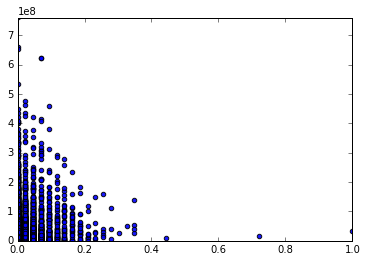

In [14]:
%matplotlib inline
x = X_scaled['facenumber_in_poster']
plt.xlim([0, 1])
plt.ylim([0, 760000000])
plt.scatter(x, y, alpha=0.9)
plt.show()

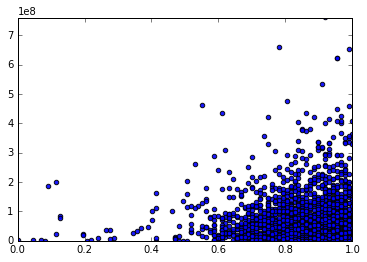

In [15]:
%matplotlib inline
x = X_scaled['title_year']
plt.xlim([0, 1])
plt.ylim([0, 760000000])
plt.scatter(x, y, alpha=0.9)
plt.show()

From the plots we can see discernable patterns in Budget, imdb_score, title_year, num_voted_users, duration and facenumber_in_poster

In [16]:
X_scaled = X_scaled[[ 'budget', 'imdb_score', 'title_year', 'num_voted_users','duration', 'facenumber_in_poster']]
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state=2)

In [17]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(2249, 6)
(2249, 1)
(750, 6)
(750, 1)


In [18]:
# In the following line, "my_linreg" is instantiated as an "object" of LinearRegression "class". 

my_linreg = LinearRegression()

# fitting the model to the training data:
my_linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [19]:
# printing Theta0 using attribute "intercept_":
print(my_linreg.intercept_)

# printing [Theta1, Theta2, Theta3] using attribute "coef_":
print(my_linreg.coef_)

[ 56277841.08360668]
[[  2.45065690e+08   1.35405465e+07  -5.87294476e+07   3.27515627e+08
   -4.71466022e+07   1.52699512e+07]]


In [20]:
# make predictions on the testing set
y_prediction = my_linreg.predict(X_test)

#print(y_prediction)

In [21]:
# Calculating "Mean Square Error" (MSE):
mse = metrics.mean_squared_error(y_test, y_prediction)

# Using numpy sqrt function to take the square root and calculate "Root Mean Square Error" (RMSE)
rmse = np.sqrt(mse)

print('Our rmse is ',rmse)

Our rmse is  50929694.9283


In [22]:
#Performing 10-fold cross validation
mse_list = cross_val_score(my_linreg, X_scaled, y, cv=10, scoring='mean_squared_error')

print(mse_list)

[ -1.35422447e+15  -1.61335380e+15  -1.08361628e+15  -1.40133432e+15
  -9.17099800e+14  -5.29573992e+14  -8.83024784e+14  -2.53706261e+15
  -3.66074504e+15  -9.34830911e+15]


C:\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Sco

In [23]:
# making our mse positive to calculate rmse
mse_list_positive = -mse_list

# using numpy sqrt function to calculate rmse:
rmse_list = np.sqrt(mse_list_positive)
print(rmse_list)

[ 36799788.93217895  40166575.70466187  32918327.45380776
  37434400.21075661  30283655.66475231  23012474.70389033
  29715732.94298853  50369262.51298467  60504091.12747509
  96686654.23248205]


In [24]:
# calculate the average RMSE as final result of cross validation:
print('Our average rmse is ',rmse_list.mean())
print('if our range is 760,000,000')
print('we have an average error of ',rmse_list.mean()/760000000)

Our average rmse is  43789096.3486
if our range is 760,000,000
we have an average error of  0.0576172320376


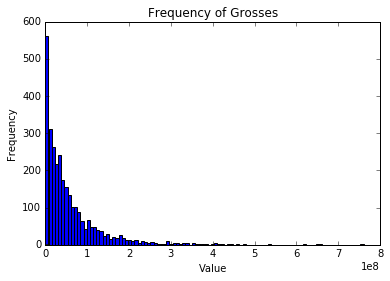

In [25]:
#plotting the frequency of out target to see the outliers
%matplotlib inline
plt.hist(movies_df['gross'], bins=100, normed=False)
plt.title("Frequency of Grosses")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

We figured we were getting a very low error because there are a few very far outliers, giving us a very large range of 760,000,000. So we decided to take out the entries over 500,000,000 to try to get a better dataset.

In [26]:
movies_df_new = pd.read_csv('movie_metadata2_usa_0_500.csv')


In [27]:
#X = movies_df[['director_facebook_likes', 'cast_total_facebook_likes', 'budget', 'imdb_score', 'movie_facebook_likes']]
#X = movies_df_new[['budget', 'imdb_score', 'title_year', 'num_voted_users', 'duration']]
X_scaled = movies_df_new[[ 'budget', 'imdb_score', 'title_year', 'num_voted_users','duration', 'facenumber_in_poster']]
#X_scaled.columns = ['budget', 'duration', 'imdb_score', 'title_year', 'num_voted_users', 'facenumber_in_poster']
X_scaled = X_scaled.apply(lambda x: ((x - x.min()) / (x.max() - x.min())))
X_scaled.head()
y = movies_df_new[['gross']]

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state=2)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(2244, 6)
(2244, 1)
(749, 6)
(749, 1)


In [29]:
# In the following line, "my_linreg" is instantiated as an "object" of LinearRegression "class". 

my_linreg = LinearRegression()

# fitting the model to the training data:
my_linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [30]:
# printing Theta0 using attribute "intercept_":
print(my_linreg.intercept_)

# printing [Theta1, Theta2, Theta3] using attribute "coef_":
print(my_linreg.coef_)

[ 52771387.1576831]
[[  2.35426711e+08   1.01146715e+07  -5.24866948e+07   3.15107918e+08
   -4.11210856e+07   1.07039361e+07]]


In [31]:
# make predictions on the testing set
y_prediction = my_linreg.predict(X_test)

#print(y_prediction)

In [32]:
# Calculating "Mean Square Error" (MSE):
mse = metrics.mean_squared_error(y_test, y_prediction)

# Using numpy sqrt function to take the square root and calculate "Root Mean Square Error" (RMSE)
rmse = np.sqrt(mse)

print(rmse)

46573483.0023


In [33]:
mse_list = cross_val_score(my_linreg, X_scaled, y, cv=10, scoring='mean_squared_error')

print(mse_list)

[ -5.77063516e+14  -8.39258118e+14  -6.03324817e+14  -8.16474561e+14
  -1.26223274e+15  -1.26993221e+15  -9.79658226e+14  -1.58866037e+15
  -2.66786195e+15  -1.96275090e+16]


C:\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Sco

In [34]:
# Notice that "cross_val_score" by default provides "negative" values for "mse" to clarify that mse is error.
# in order to calculate root mean square error (rmse), we have to make them positive!
mse_list_positive = -mse_list

# using numpy sqrt function to calculate rmse:
rmse_list = np.sqrt(mse_list_positive)
print(rmse_list)

[  2.40221464e+07   2.89699520e+07   2.45626712e+07   2.85740190e+07
   3.55279149e+07   3.56361082e+07   3.12994924e+07   3.98580026e+07
   5.16513499e+07   1.40098212e+08]


In [35]:
# calculate the average RMSE as final result of cross validation:
# calculate the average RMSE as final result of cross validation:
print('Our average rmse is ',rmse_list.mean())
print('for an average error of ',rmse_list.mean()/500000000)

Our average rmse is  44019986.8491
for an average error of  0.0880399736982


We now wanted to try to see if there were other any combinations of features that would give us better results

In [36]:
X_scaled = movies_df_new[['budget', 'imdb_score', 'title_year', 'facenumber_in_poster']]
 
X_scaled.head()
y = movies_df_new[['gross']]
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state=2)
my_linreg = LinearRegression()
my_linreg.fit(X_train, y_train)
print('intercept: ',my_linreg.intercept_)
print('coefficients: ',my_linreg.coef_)
y_prediction = my_linreg.predict(X_test)
mse = metrics.mean_squared_error(y_test, y_prediction)
rmse = np.sqrt(mse)

print('rmse: ',rmse)
mse_list = cross_val_score(my_linreg, X_scaled, y, cv=10, scoring='mean_squared_error')

#print(mse_list)
mse_list_positive = -mse_list
rmse_list = np.sqrt(mse_list_positive)
#print(rmse_list)
print('Our average rmse is ',rmse_list.mean())
print('for an average error of ',rmse_list.mean()/500000000)

intercept:  [  8.92970248e+08]
coefficients:  [[  1.00166221e+00   1.41233176e+07  -4.82972567e+05   1.75365405e+05]]
rmse:  52637577.7382
Our average rmse is  48201925.836
for an average error of  0.0964038516721


C:\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Sco

In [37]:
X_scaled = movies_df_new[['budget', 'imdb_score', 'facenumber_in_poster']]
 
X_scaled.head()
y = movies_df_new[['gross']]
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state=2)
my_linreg = LinearRegression()
my_linreg.fit(X_train, y_train)
print('intercept: ',my_linreg.intercept_)
print('coefficients: ',my_linreg.coef_)
y_prediction = my_linreg.predict(X_test)
mse = metrics.mean_squared_error(y_test, y_prediction)
rmse = np.sqrt(mse)

print('rmse: ',rmse)
mse_list = cross_val_score(my_linreg, X_scaled, y, cv=10, scoring='mean_squared_error')

#print(mse_list)
mse_list_positive = -mse_list
rmse_list = np.sqrt(mse_list_positive)
#print(rmse_list)
print('Our average rmse is ',rmse_list.mean())
print('for an average error of ',rmse_list.mean()/500000000)

intercept:  [-77782305.50751807]
coefficients:  [[  9.72048830e-01   1.48951569e+07  -2.02774964e+04]]
rmse:  52979641.3355
Our average rmse is  48198323.7461
for an average error of  0.0963966474923


C:\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Sco

In [38]:
X_scaled = movies_df_new[['budget', 'facenumber_in_poster']]
 
X_scaled.head()
y = movies_df_new[['gross']]
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state=2)
my_linreg = LinearRegression()
my_linreg.fit(X_train, y_train)
print('intercept: ',my_linreg.intercept_)
print('coefficients: ',my_linreg.coef_)
y_prediction = my_linreg.predict(X_test)
mse = metrics.mean_squared_error(y_test, y_prediction)
rmse = np.sqrt(mse)

print('rmse: ',rmse)
mse_list = cross_val_score(my_linreg, X_scaled, y, cv=10, scoring='mean_squared_error')

#print(mse_list)
mse_list_positive = -mse_list
rmse_list = np.sqrt(mse_list_positive)
#print(rmse_list)
print('Our average rmse is ',rmse_list.mean())
print('for an average error of ',rmse_list.mean()/500000000)

intercept:  [ 17252524.86890961]
coefficients:  [[  9.95154167e-01  -5.56262256e+05]]
rmse:  55271546.7735
Our average rmse is  49036047.8687
for an average error of  0.0980720957375


C:\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Sco

In [39]:
X_scaled = movies_df_new[['budget']]
 
X_scaled.head()
y = movies_df_new[['gross']]
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state=2)
my_linreg = LinearRegression()
my_linreg.fit(X_train, y_train)
print('intercept: ',my_linreg.intercept_)
print('coefficients: ',my_linreg.coef_)
y_prediction = my_linreg.predict(X_test)
mse = metrics.mean_squared_error(y_test, y_prediction)
rmse = np.sqrt(mse)

print('rmse: ',rmse)
mse_list = cross_val_score(my_linreg, X_scaled, y, cv=10, scoring='mean_squared_error')

#print(mse_list)
mse_list_positive = -mse_list
rmse_list = np.sqrt(mse_list_positive)
#print(rmse_list)
print('Our average rmse is ',rmse_list.mean())
print('for an average error of ',rmse_list.mean()/500000000)

intercept:  [ 16419056.76799704]
coefficients:  [[ 0.99606713]]
rmse:  55288982.7301
Our average rmse is  49014072.0944
for an average error of  0.0980281441888


C:\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Sco

In [40]:
X_scaled = movies_df_new[[ 'budget', 'imdb_score', 'title_year', 'num_voted_users', 'facenumber_in_poster']]
 
X_scaled.head()
y = movies_df_new[['gross']]
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state=2)
my_linreg = LinearRegression()
my_linreg.fit(X_train, y_train)
print('intercept: ',my_linreg.intercept_)
print('coefficients: ',my_linreg.coef_)
y_prediction = my_linreg.predict(X_test)
mse = metrics.mean_squared_error(y_test, y_prediction)
rmse = np.sqrt(mse)

print('rmse: ',rmse)
mse_list = cross_val_score(my_linreg, X_scaled, y, cv=10, scoring='mean_squared_error')

#print(mse_list)
mse_list_positive = -mse_list
rmse_list = np.sqrt(mse_list_positive)
#print(rmse_list)
print('Our average rmse is ',rmse_list.mean())
print('for an average error of ',rmse_list.mean()/500000000)

intercept:  [  1.12590335e+09]
coefficients:  [[  7.64092266e-01   4.48547552e+05  -5.60895860e+05   1.84608208e+02
    1.85072219e+05]]
rmse:  46868277.7155
Our average rmse is  44028571.9416
for an average error of  0.0880571438831


C:\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Sco